---
# 01. Data Preparation
---

In [215]:
import pandas as pd

# 데이터 불러오기(인코딩)
CancerData = pd.read_csv("/content/drive/MyDrive/dataset/cancer_reg.csv", encoding="utf-8")

In [216]:
# 중복되는 행 제거
CancerData = CancerData.drop_duplicates()

---
# 02. Data Checking
---

In [217]:
# 데이터 형태 확인 
CancerData.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
0,1397.0,469,489.8,61898,260131,11.2,499.748204,39.3,36.9,41.7,...,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831,164.9
1,173.0,70,411.6,48127,43269,18.6,23.111234,33.0,32.2,33.7,...,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096,161.3
2,102.0,50,349.7,49348,21026,14.6,47.560164,45.0,44.0,45.8,...,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488,174.7
3,427.0,202,430.4,44243,75882,17.1,342.637253,42.8,42.2,43.4,...,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841,194.8
4,57.0,26,350.1,49955,10321,12.5,0.000000,48.3,47.8,48.9,...,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657,144.4


In [218]:
# 데이터 프레임의 행을 랜덤하게 섞음
CancerData = CancerData.sample(frac=1).reset_index(drop=True)

In [219]:
# DataFrame의 columns 확인
CancerData.columns

Index(['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'medIncome',
       'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge',
       'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24',
       'PctHS25_Over', 'PctBachDeg25_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctEmpPrivCoverage', 'PctPublicCoverage',
       'PctPublicCoverageAlone', 'PctWhite', 'PctBlack', 'PctAsian',
       'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate',
       'TARGET_deathRate'],
      dtype='object')

In [220]:
# 데이터 정보 확인하기 
CancerData.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   avgAnnCount             3047 non-null   float64
 1   avgDeathsPerYear        3047 non-null   int64  
 2   incidenceRate           3047 non-null   float64
 3   medIncome               3047 non-null   int64  
 4   popEst2015              3047 non-null   int64  
 5   povertyPercent          3047 non-null   float64
 6   studyPerCap             3047 non-null   float64
 7   MedianAge               3047 non-null   float64
 8   MedianAgeMale           3047 non-null   float64
 9   MedianAgeFemale         3047 non-null   float64
 10  AvgHouseholdSize        3047 non-null   float64
 11  PercentMarried          3047 non-null   float64
 12  PctNoHS18_24            3047 non-null   float64
 13  PctHS18_24              3047 non-null   float64
 14  PctBachDeg18_24         3047 non-null   

In [221]:
# DataFrame 전체의 결측치 갯수 확인
CancerData.isna().sum()

avgAnnCount               0
avgDeathsPerYear          0
incidenceRate             0
medIncome                 0
popEst2015                0
povertyPercent            0
studyPerCap               0
MedianAge                 0
MedianAgeMale             0
MedianAgeFemale           0
AvgHouseholdSize          0
PercentMarried            0
PctNoHS18_24              0
PctHS18_24                0
PctBachDeg18_24           0
PctHS25_Over              0
PctBachDeg25_Over         0
PctUnemployed16_Over      0
PctPrivateCoverage        0
PctEmpPrivCoverage        0
PctPublicCoverage         0
PctPublicCoverageAlone    0
PctWhite                  0
PctBlack                  0
PctAsian                  0
PctOtherRace              0
PctMarriedHouseholds      0
BirthRate                 0
TARGET_deathRate          0
dtype: int64

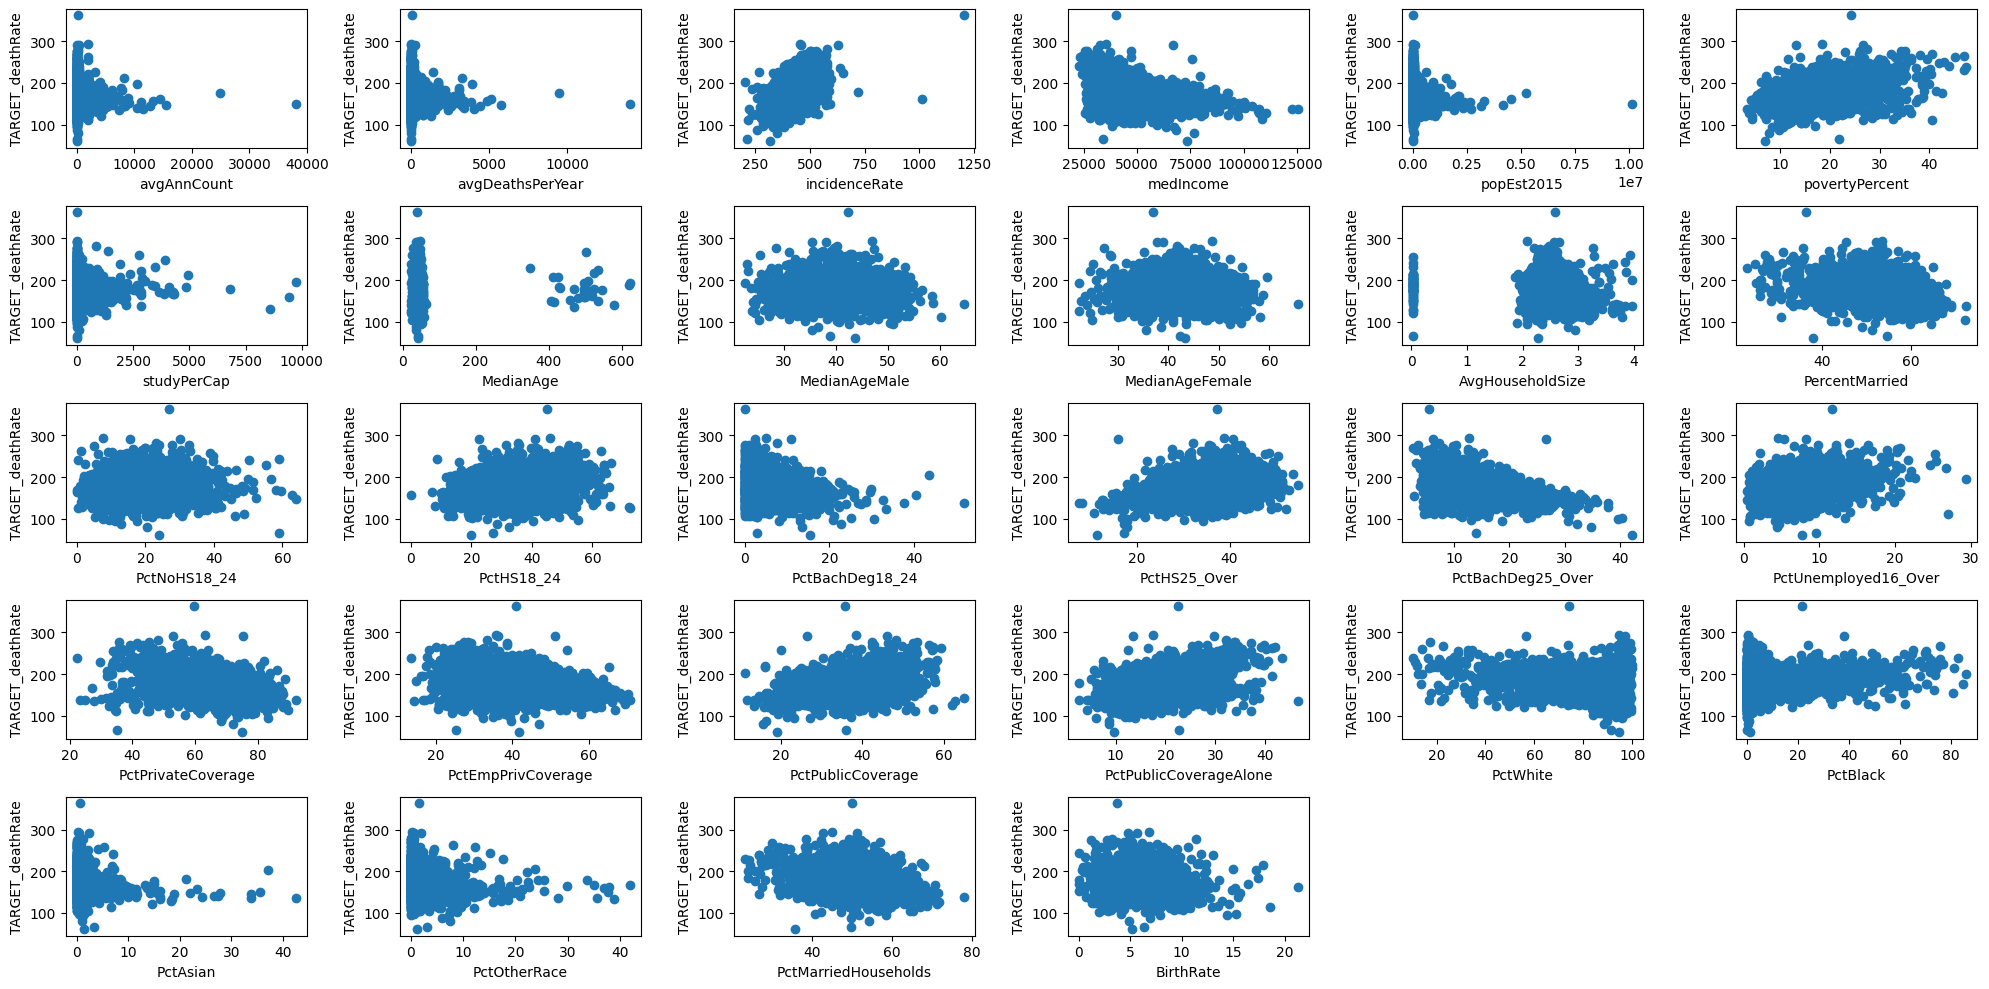

In [222]:
# FeatureData & TargetData
FeatureData = ['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'medIncome',
       'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge',
       'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24',
       'PctHS25_Over', 'PctBachDeg25_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctEmpPrivCoverage', 'PctPublicCoverage',
       'PctPublicCoverageAlone', 'PctWhite', 'PctBlack', 'PctAsian',
       'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate']
TargetData = ['TARGET_deathRate']

# 산점도 그리기
num_features = len(FeatureData)
num_cols = 6  # 열의 개수 조정
num_rows = num_features // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20,10))

for i, feature in enumerate(FeatureData):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].scatter(X[:, i], y)
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('TARGET_deathRate')

# 빈 서브플롯 숨기기
if num_features % num_cols != 0:
    for j in range(num_features % num_cols, num_cols):
        fig.delaxes(axes[-1, j])

plt.tight_layout()
plt.show()

---
# 03. Linear Regression : L2 Regularization [Ridge]
---


###  * FeatureData & TargetData 형태 확인
``` 
FeatureData = ['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'medIncome',
       'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge',
       'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24',
       'PctHS25_Over', 'PctBachDeg25_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctEmpPrivCoverage', 'PctPublicCoverage',
       'PctPublicCoverageAlone', 'PctWhite', 'PctBlack', 'PctAsian',
       'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate']
TargetData = ['TARGET_deathRate']
```



In [223]:
# DataFrame의 value 추출
X = CancerData[FeatureData].values
y = CancerData[TargetData].values

In [253]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

n_runs = 10
rmse_list = []
r2_list = []
optimal_reg_alpha_list = []
l2_weights = []

for epoch in range(n_runs):
    # reg_model 정의
    reg_model = Ridge()

    # 데이터 분할 - Training Data 80%, Validation Data 10%, Test Data 10%
    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.1)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.1)

    # Feature 정규화
    scaler = StandardScaler()
    X_train_normalized = scaler.fit_transform(X_train)
    X_val_normalized = scaler.transform(X_val)

    # 10 epoch 동안 L2 정규화 가중치 계산 및 저장
    reg_model.fit(X_train_normalized, y_train)
    l2_weights.append(reg_model.coef_)

    # 검증 데이터를 사용하여 모델 평가
    val_score = reg_model.score(X_val_normalized, y_val)
    y_pred = reg_model.predict(X_val_normalized)
    print(f"[ Epoch {epoch+1} ]")

    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val, y_pred)

    print('RMSE:', rmse)
    print('R2 Score:', r2)

[ Epoch 1 ]
RMSE: 19.534750725601707
R2 Score: 0.45769560154045097
[ Epoch 2 ]
RMSE: 18.882323694431786
R2 Score: 0.5649930076352884
[ Epoch 3 ]
RMSE: 18.273622127048736
R2 Score: 0.5691026248138775
[ Epoch 4 ]
RMSE: 18.899036463421258
R2 Score: 0.4851481778260579
[ Epoch 5 ]
RMSE: 20.10984045209034
R2 Score: 0.5242358870970067
[ Epoch 6 ]
RMSE: 18.42988543915828
R2 Score: 0.5143597159649127
[ Epoch 7 ]
RMSE: 20.90904582335967
R2 Score: 0.4792272022555887
[ Epoch 8 ]
RMSE: 19.08304553704736
R2 Score: 0.5362030998804072
[ Epoch 9 ]
RMSE: 16.611608933306655
R2 Score: 0.5960976637210839
[ Epoch 10 ]
RMSE: 22.61641422260035
R2 Score: 0.43630675115971185


In [254]:
# 저장된 가중치의 평균 계산
avg_l2_weight = np.mean(l2_weights, axis=0)

# 저장된 가중치의 평균과 편향 계산
avg_bias = np.mean(y_train)

# 최종 모델 생성 및 L2 정규화 가중치 및 편향 설정
final_ridge_model = Ridge(alpha=1.0)  # 기본 alpha 값으로 초기화
final_ridge_model.coef_ = avg_l2_weight
final_ridge_model.intercept_ = avg_bias

# 테스트 데이터를 사용하여 최종 모델 평가
X_test_normalized = scaler.transform(X_test)
y_pred = final_ridge_model.predict(X_test_normalized)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('[ 최종 RMSE와 R2 Score를 사용하여 학습된 Model을 평가 ]')
print('RMSE:', rmse)
print('R2 Score:', r2)
print('avg_l2_weight:', avg_l2_weight)
print('avg_bias:', avg_bias) 

[ 최종 RMSE와 R2 Score를 사용하여 학습된 Model을 평가 ]
RMSE: 17.9387094613626
R2 Score: 0.5055363801681156
avg_l2_weight: [[-5.13135252e+00  9.86074094e+00  1.04954425e+01  1.06446373e+00
  -5.45455783e+00  4.10001273e+00  4.13202937e-03 -1.53082522e-01
  -2.27566302e+00 -1.04909364e-01  1.56593598e-01  5.74580469e+00
  -8.16222714e-01  2.22964211e+00 -4.63722438e-01  2.56970339e+00
  -6.89569946e+00  1.02156788e+00 -4.48927012e+00  2.72395663e+00
   3.97746666e-02  7.96601343e-01 -1.77514136e+00 -4.73626516e-01
   2.58325342e-01 -3.16223938e+00 -5.48743975e+00 -1.76252152e+00]]
avg_bias: 178.86708552898256


---
# 04. Relevance: Statistics Indicators & TARGET_deathRate
---

In [255]:
# Feature와 TARGET_deathRate 사이의 관련성 계산
correlation = []
for i, feature in enumerate(FeatureData):
    feature_values = X[:, i].reshape(-1, 1)
    correlation_value = np.corrcoef(feature_values.flatten(), y.flatten())[0, 1]
    correlation.append(correlation_value)

# 가중치와 관련성 출력
print('[ 피처와 TARGET_deathRate와의 관련성 및 가중치 ]')
for i, (feature, weight, corr) in enumerate(zip(FeatureData, final_ridge_model.coef_.reshape(-1), correlation)):
    print(f'Feature {i+1}: {corr}')
    print(f'Weight {i+1}: {weight}')

    if corr < 0:
        print(">> 음의 선형 관계")
    else:
        print(">> 양의 선형 관계")
    print()

[ 피처와 TARGET_deathRate와의 관련성 및 가중치 ]
Feature 1: -0.14353161968868813
Weight 1: -5.131352516262644
>> 음의 선형 관계

Feature 2: -0.09071515998919767
Weight 2: 9.860740938342502
>> 음의 선형 관계

Feature 3: 0.4494316975614456
Weight 3: 10.495442460011521
>> 양의 선형 관계

Feature 4: -0.4286149270709036
Weight 4: 1.0644637315295504
>> 음의 선형 관계

Feature 5: -0.12007309573645848
Weight 5: -5.454557825375221
>> 음의 선형 관계

Feature 6: 0.42938898025645084
Weight 6: 4.1000127305624785
>> 양의 선형 관계

Feature 7: -0.022285010772377566
Weight 7: 0.004132029370123186
>> 음의 선형 관계

Feature 8: 0.004375077181243774
Weight 8: -0.15308252162219743
>> 양의 선형 관계

Feature 9: -0.021929429076614965
Weight 9: -2.2756630249001657
>> 음의 선형 관계

Feature 10: 0.012048385965001452
Weight 10: -0.10490936367729213
>> 양의 선형 관계

Feature 11: -0.036905313810215196
Weight 11: 0.15659359838043702
>> 음의 선형 관계

Feature 12: -0.2668204635535113
Weight 12: 5.745804693996775
>> 음의 선형 관계

Feature 13: 0.08846261004222873
Weight 13: -0.8162227142680916
>>

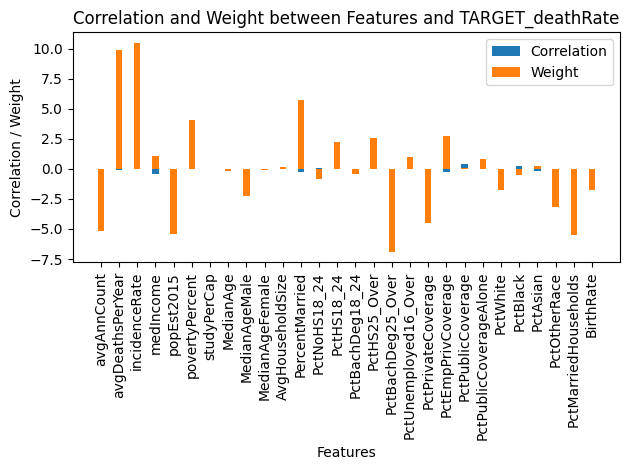

In [256]:
import matplotlib.pyplot as plt

# 막대 그래프로 관련성과 가중치 시각화
x = range(len(FeatureData))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x, correlation, width, label='Correlation')
ax.bar(x, final_ridge_model.coef_.reshape(-1), width, label='Weight')

ax.set_xlabel('Features')
ax.set_ylabel('Correlation / Weight')
ax.set_title('Correlation and Weight between Features and TARGET_deathRate')
ax.set_xticks(x)
ax.set_xticklabels(FeatureData, rotation=90)
ax.legend()

plt.tight_layout()
plt.show()